In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
data = pd.read_csv('./used_car_data.csv')

In [ ]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


# Data Cleaning

In [ ]:
mileage = data['Mileage']
 
for i in range (0 ,len(mileage)):    
    x= str(mileage[i])
    if "kmpl" in x[-4:]:
        x = x[:-4:]
        float_x = float(x)
        
        mileage[i]= float_x
    elif "km/kg" in x[-5:]:
        x = x[:-5:]
        float_x = float(x)
        mileage[i] = float_x
print (data)

<ipython-input-5-c4916ff30f4b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mileage[i] = float_x
<ipython-input-5-c4916ff30f4b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mileage[i]= float_x


                                  Name    Location  Year  Kilometers_Driven  \
0               Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                         Honda Jazz V     Chennai  2011              46000   
3                    Maruti Ertiga VDI     Chennai  2012              87000   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
...                                ...         ...   ...                ...   
6014                  Maruti Swift VDI       Delhi  2014              27365   
6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015             100000   
6016             Mahindra Xylo D4 BSIV      Jaipur  2012              55000   
6017                Maruti Wagon R VXI     Kolkata  2013              46000   
6018             Chevrolet Beat Diesel   Hyderabad  2011              47000   

     Fuel_Type Transmission Owner_Type Mileage   En

In [ ]:
engine = data['Engine']
 
for i in range (0 ,len(engine)):    
    x= str(engine[i])
    if "CC" in x[-2:]:
        x = x[:-2:]
        float_x = float(x)
        
        engine[i]= float_x
print (data)

<ipython-input-6-1dd44a3eb789>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  engine[i]= float_x


                                  Name    Location  Year  Kilometers_Driven  \
0               Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                         Honda Jazz V     Chennai  2011              46000   
3                    Maruti Ertiga VDI     Chennai  2012              87000   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
...                                ...         ...   ...                ...   
6014                  Maruti Swift VDI       Delhi  2014              27365   
6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015             100000   
6016             Mahindra Xylo D4 BSIV      Jaipur  2012              55000   
6017                Maruti Wagon R VXI     Kolkata  2013              46000   
6018             Chevrolet Beat Diesel   Hyderabad  2011              47000   

     Fuel_Type Transmission Owner_Type Mileage Engi

In [ ]:
power = data['Power']
 
for i in range (0 ,len(power)):    
    x= str(power[i])
    if "bhp" in x[-3:]:
        x = x[:-3:]
        if x == 'null ':
            x = 0
            
        float_x = float(x)
        
        power[i]= float_x
print (data)

<ipython-input-7-0fa62a797293>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  power[i]= float_x


                                  Name    Location  Year  Kilometers_Driven  \
0               Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                         Honda Jazz V     Chennai  2011              46000   
3                    Maruti Ertiga VDI     Chennai  2012              87000   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
...                                ...         ...   ...                ...   
6014                  Maruti Swift VDI       Delhi  2014              27365   
6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015             100000   
6016             Mahindra Xylo D4 BSIV      Jaipur  2012              55000   
6017                Maruti Wagon R VXI     Kolkata  2013              46000   
6018             Chevrolet Beat Diesel   Hyderabad  2011              47000   

     Fuel_Type Transmission Owner_Type Mileage Engi

In [ ]:
data['Mileage'] = data['Mileage'].replace(to_replace = 0, value = np.nan)
data = data.dropna(subset=['Mileage'])

In [ ]:
data['Engine'] = data['Engine'].astype(float)
data['Power'] = data['Power'].astype(float)

# 1. Merek Mobil dan Jumlahnya

In [ ]:
data['Brand_Name'] = data['Name'].apply(lambda x: str(x).split(" ")[0])

In [ ]:
car_name = data['Brand_Name'].value_counts()

In [ ]:
car_name

Maruti           1210
Hyundai          1075
Honda             605
Toyota            408
Volkswagen        314
Mercedes-Benz     306
Ford              299
Mahindra          269
BMW               267
Audi              235
Tata              186
Skoda             171
Renault           145
Chevrolet         121
Nissan             91
Land               51
Jaguar             40
Mitsubishi         27
Fiat               27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Bentley             1
Lamborghini         1
Ambassador          1
Isuzu               1
Name: Brand_Name, dtype: int64

# 2. Kota yang Memiliki Mobil Bekas Terbanyak

In [ ]:
location = data['Location'].value_counts()

In [ ]:
location

Mumbai        784
Hyderabad     731
Kochi         648
Coimbatore    629
Pune          611
Delhi         552
Kolkata       532
Chennai       485
Jaipur        408
Bangalore     349
Ahmedabad     220
Name: Location, dtype: int64

<BarContainer object of 11 artists>

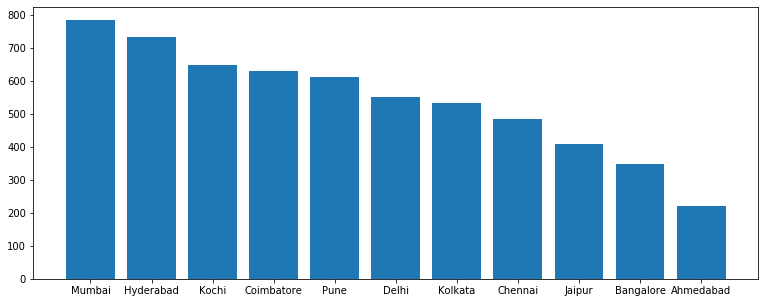

In [ ]:
plt.figure(figsize=(13,5))
plt.bar(location.keys(), location.values)

# 3. Distribusi Tahun Edisi Mobil

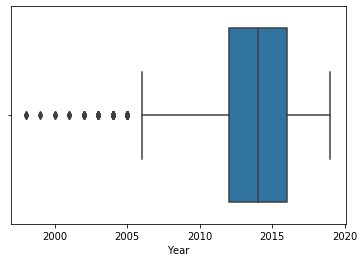

In [ ]:
sns.boxplot(x=data['Year'])

In [ ]:
year = data['Year'].value_counts()

In [ ]:
year

2014    795
2015    741
2016    738
2013    647
2017    587
2012    569
2011    462
2010    338
2018    297
2009    193
2008    167
2007    121
2019     99
2006     74
2005     52
2004     26
2003     16
2002     11
2001      6
1998      4
2000      4
1999      2
Name: Year, dtype: int64

(0, 2020)

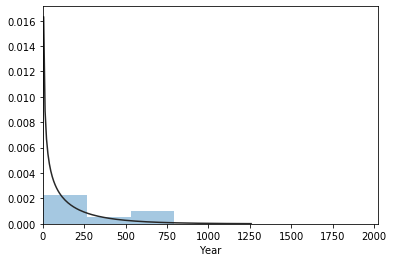

In [ ]:
sns.distplot(year, kde=False, fit=stats.gamma ) 
plt.xlim([0,2020])

<BarContainer object of 22 artists>

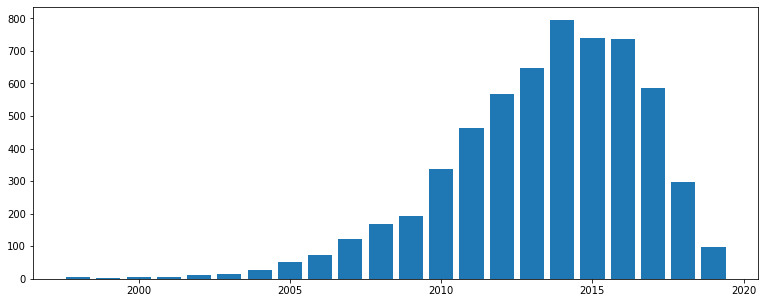

In [ ]:
plt.figure(figsize=(13,5))
plt.bar(year.keys(), year.values)

# 4. Mobil dengan Total Jarak Pemakaian dibawah 100.000 km

In [ ]:
km_min = data.loc[data['Kilometers_Driven'].values < 100000]

In [ ]:
km_min

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand_Name
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6013,Honda Amaze VX i-DTEC,Coimbatore,2015,70602,Diesel,Manual,First,25.80,1498.0,98.60,5.0,4.83,Honda
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75,Maruti
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90,Mahindra
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65,Maruti


# 5. Batas Total Jarak Pemakaian

In [ ]:
data.mean()

Year                  2013.406287
Kilometers_Driven    58578.681963
Mileage                 18.342252
Engine                1620.186361
Power                  111.628611
Seats                    5.280284
Price                    9.456606
dtype: float64

In [ ]:
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5949.000000,5.949000e+03,5949.000000,5924.000000,5924.000000,5919.000000,5949.000000
mean,2013.406287,5.857868e+04,18.342252,1620.186361,111.628611,5.280284,9.456606
std,3.220777,9.167121e+04,4.175475,598.582314,55.001086,0.808038,11.139700
min,1998.000000,1.710000e+02,6.400000,624.000000,0.000000,0.000000,0.440000
25%,2012.000000,3.390100e+04,15.300000,1198.000000,74.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.200000,1493.000000,93.700000,5.000000,5.650000
75%,2016.000000,7.300000e+04,21.100000,1984.000000,138.100000,5.000000,9.900000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


# 6. Outlier pada Kolom Kilometers_Driven

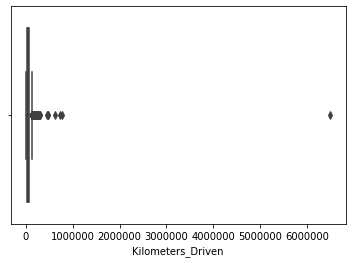

In [ ]:
sns.boxplot(x=data['Kilometers_Driven'])

In [ ]:
outlier = data.loc[data['Kilometers_Driven'].values < 600000]
outlier

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand_Name
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75,Maruti
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00,Hyundai
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90,Mahindra
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65,Maruti


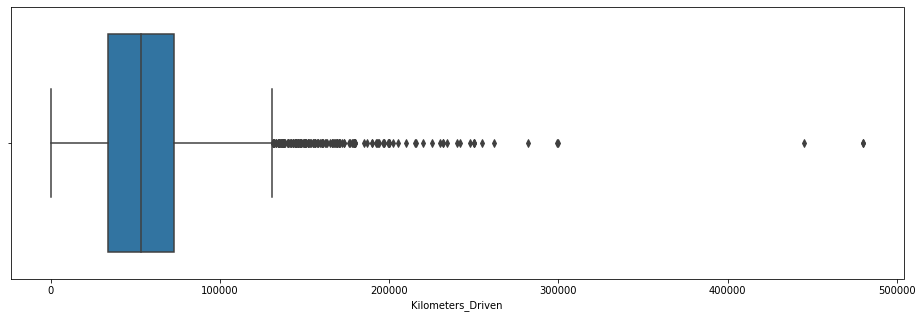

In [ ]:
plt.figure(figsize=(16,5))
sns.boxplot(x=outlier['Kilometers_Driven'])

# 7. Pengaruh Tahun Pembuatan terhadap Total Jarak Pemakaian

In [ ]:
data.corr()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
Year,1.000000,-0.170561,0.296718,-0.059206,0.049545,0.014011,0.302463
Kilometers_Driven,-0.170561,1.000000,-0.064283,0.092561,0.028730,0.081654,-0.009048
Mileage,0.296718,-0.064283,1.000000,-0.646476,-0.528542,-0.344770,-0.333263
Engine,-0.059206,0.092561,-0.646476,1.000000,0.846096,0.396462,0.658365
Power,0.049545,0.028730,-0.528542,0.846096,1.000000,0.111277,0.763067
Seats,0.014011,0.081654,-0.344770,0.396462,0.111277,1.000000,0.054557
Price,0.302463,-0.009048,-0.333263,0.658365,0.763067,0.054557,1.000000


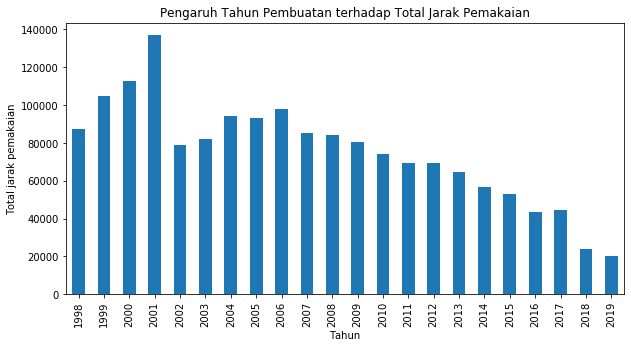

In [ ]:
corr_data = data.groupby('Year')['Kilometers_Driven'].mean()
corr_data.plot(kind='bar', figsize=(10,5))
plt.title('Pengaruh Tahun Pembuatan terhadap Total Jarak Pemakaian')
plt.ylabel('Total jarak pemakaian')
plt.xlabel('Tahun');

# 8. Mobil dengan Pemilik Orang Ketiga atau Lebih

In [ ]:
mask = ((data['Owner_Type'].values != 'First') & (data['Owner_Type'].values != 'Second'))

In [ ]:
car_owner = data.loc[mask]

In [ ]:
car_owner.count()

Name                 117
Location             117
Year                 117
Kilometers_Driven    117
Fuel_Type            117
Transmission         117
Owner_Type           117
Mileage              117
Engine               114
Power                114
Seats                114
Price                117
Brand_Name           117
dtype: int64

# 9. Tipe Bahan Bakar dengan Mileage Paling Hemat

In [ ]:
data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand_Name
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75,Maruti
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00,Hyundai
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90,Mahindra
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65,Maruti


In [ ]:
data.loc[data['Mileage'].values < 10]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand_Name
70,Porsche Cayenne 2009-2014 Turbo,Mumbai,2008,73000,Petrol,Automatic,First,8.50,4806.0,500.00,5.0,14.50,Porsche
152,Mercedes-Benz S Class 2005 2013 S 500,Kolkata,2010,35277,Petrol,Automatic,First,7.81,5461.0,362.90,5.0,30.00,Mercedes-Benz
326,BMW 6 Series 640d Gran Coupe,Mumbai,2011,30000,Diesel,Automatic,First,9.52,2993.0,313.00,4.0,49.00,BMW
557,Audi TT 2.0 TFSI,Delhi,2013,12100,Petrol,Automatic,First,9.90,1984.0,207.80,2.0,29.50,Audi
655,Jaguar XJ 2.0L Portfolio,Mumbai,2017,10501,Petrol,Automatic,First,9.43,1999.0,237.40,5.0,75.00,Jaguar
885,Maruti Grand Vitara AT,Chennai,2008,77000,Petrol,Automatic,Fourth & Above,9.70,1995.0,163.50,5.0,5.50,Maruti
926,Porsche Cayman 2009-2012 S,Hyderabad,2010,10000,Petrol,Manual,First,9.00,3436.0,0.00,2.0,40.00,Porsche
1078,Porsche Boxster S tiptronic,Kolkata,2015,10512,Petrol,Automatic,First,8.60,2706.0,265.00,2.0,64.00,Porsche
1123,BMW 7 Series 2007-2012 740Li,Pune,2008,66000,Petrol,Automatic,Second,8.45,2979.0,321.00,5.0,10.75,BMW
1288,Audi TT 2.0 TFSI,Kochi,2014,14262,Petrol,Automatic,First,9.90,1984.0,207.80,2.0,27.35,Audi


In [ ]:
data['Mileage'].min()

6.4

In [ ]:
data.loc[data['Mileage'].values == 6.4]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand_Name
5781,Lamborghini Gallardo Coupe,Delhi,2011,6500,Petrol,Automatic,Third,6.4,5204.0,560.0,2.0,120.0,Lamborghini


In [ ]:
data.groupby(by=["Fuel_Type"])['Mileage'].mean()

Fuel_Type
CNG       25.418036
Diesel    18.778682
LPG       19.385000
Petrol    17.679168
Name: Mileage, dtype: float64

# 10. Faktor-faktor yang Mempengaruhi Harga Mobil Bekas di India

In [ ]:
data.corr()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
Year,1.000000,-0.170561,0.296718,-0.059206,0.049545,0.014011,0.302463
Kilometers_Driven,-0.170561,1.000000,-0.064283,0.092561,0.028730,0.081654,-0.009048
Mileage,0.296718,-0.064283,1.000000,-0.646476,-0.528542,-0.344770,-0.333263
Engine,-0.059206,0.092561,-0.646476,1.000000,0.846096,0.396462,0.658365
Power,0.049545,0.028730,-0.528542,0.846096,1.000000,0.111277,0.763067
Seats,0.014011,0.081654,-0.344770,0.396462,0.111277,1.000000,0.054557
Price,0.302463,-0.009048,-0.333263,0.658365,0.763067,0.054557,1.000000


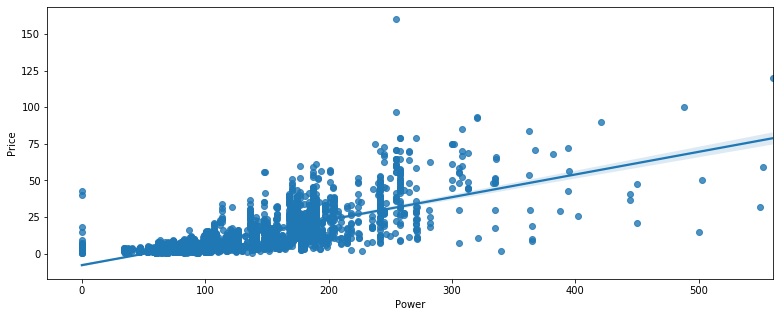

In [ ]:
plt.figure(figsize=(13,5))
sns.regplot(x='Power', y='Price', data=data)

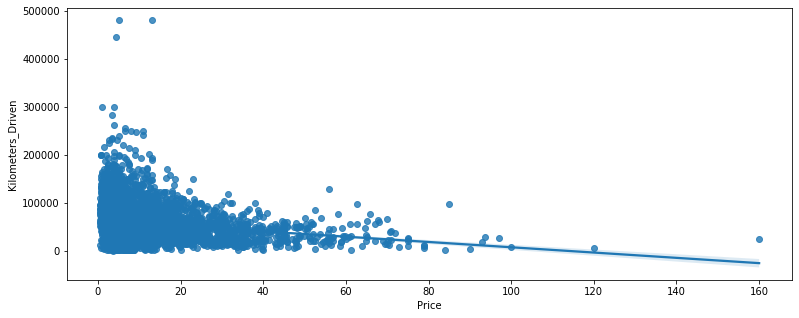

In [ ]:
plt.figure(figsize=(13,5))
sns.regplot(x='Price', y='Kilometers_Driven', data=outlier)

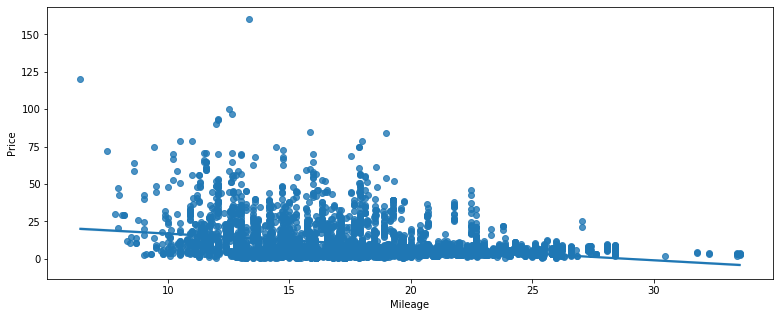

In [ ]:
plt.figure(figsize=(13,5))
sns.regplot(x='Mileage', y='Price', data=data)

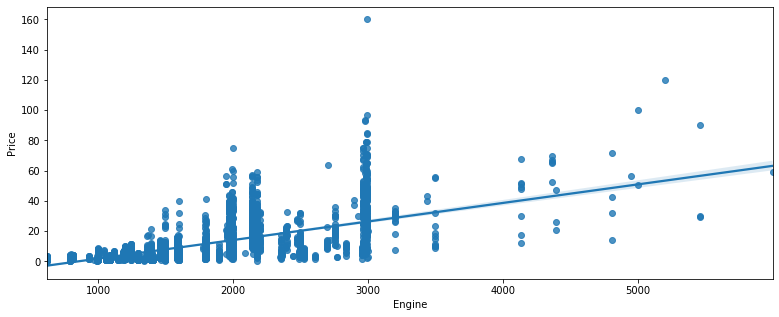

In [ ]:
plt.figure(figsize=(13,5))
sns.regplot(x='Engine', y='Price', data=data)

<BarContainer object of 5949 artists>

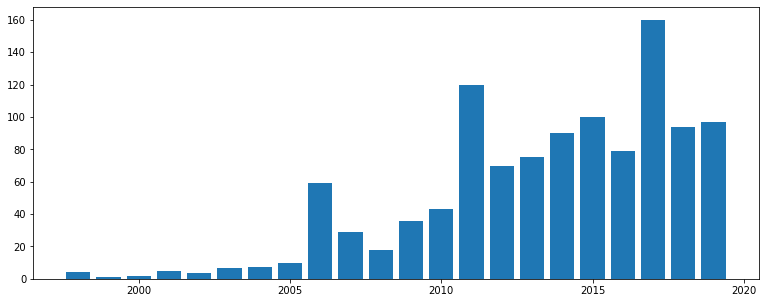

In [ ]:
plt.figure(figsize=(13,5))
plt.bar(data['Year'], data['Price'] )

<BarContainer object of 5949 artists>

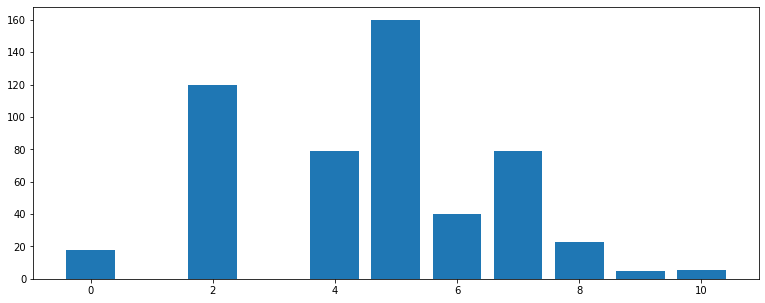

In [ ]:
plt.figure(figsize=(13,5))
plt.bar(data['Seats'], data['Price'] )

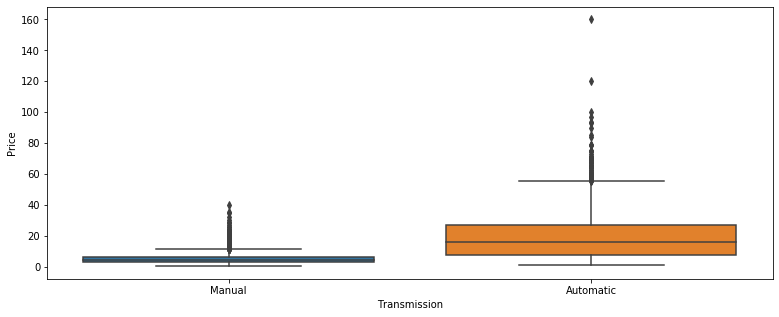

In [ ]:
plt.figure(figsize=(13,5))
sns.boxplot(x='Transmission', y='Price', data=data)

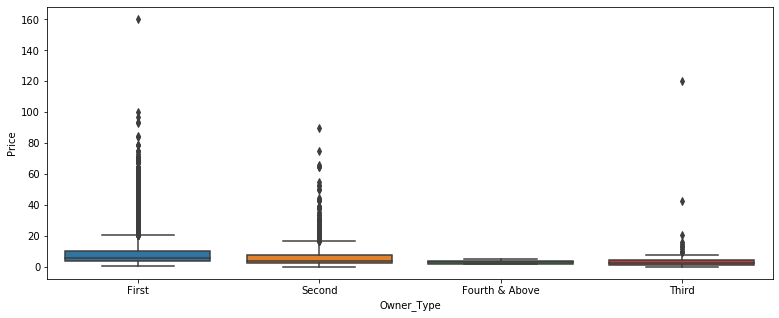

In [ ]:
plt.figure(figsize=(13,5))
sns.boxplot(x='Owner_Type', y='Price', data=data)

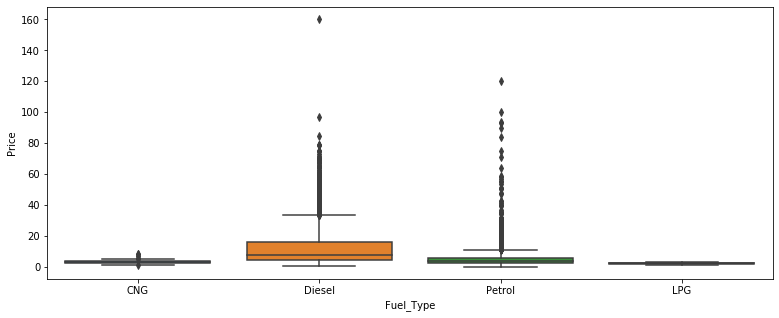

In [ ]:
plt.figure(figsize=(13,5))
sns.boxplot(x='Fuel_Type', y='Price', data=data)

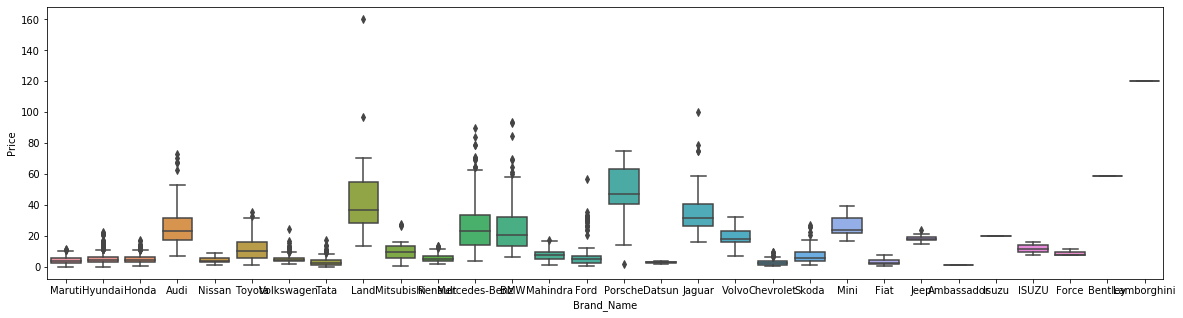

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(x='Brand_Name', y='Price', data=data)

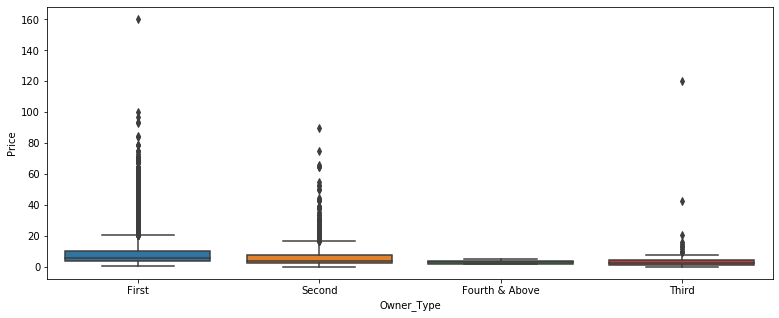

In [ ]:
plt.figure(figsize=(13,5))
sns.boxplot(x='Owner_Type', y='Price', data=data)

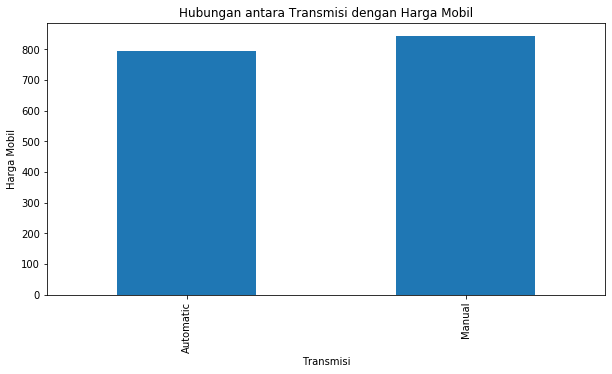

In [ ]:
transmission_plt = data.groupby('Transmission')['Price'].nunique()
transmission_plt.plot(kind='bar', figsize=(10,5))
plt.title('Hubungan antara Transmisi dengan Harga Mobil')
plt.ylabel('Harga Mobil')
plt.xlabel('Transmisi');

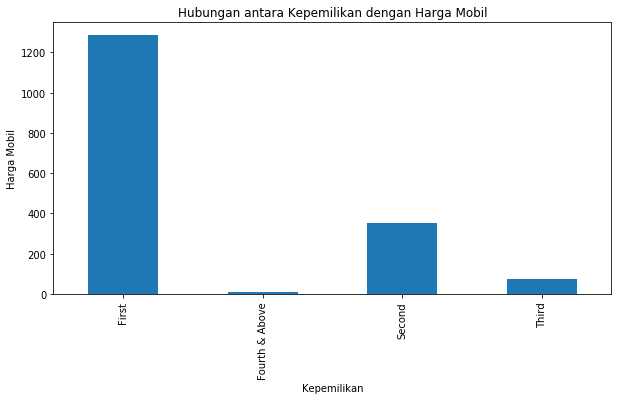

In [ ]:
owner_plt = data.groupby('Owner_Type')['Price'].nunique()
owner_plt.plot(kind='bar', figsize=(10,5))
plt.title('Hubungan antara Kepemilikan dengan Harga Mobil')
plt.ylabel('Harga Mobil')
plt.xlabel('Kepemilikan');

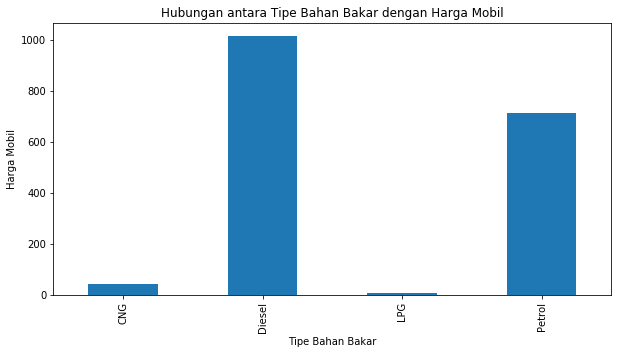

In [ ]:
fuel_plt = data.groupby('Fuel_Type')['Price'].nunique()
fuel_plt.plot(kind='bar', figsize=(10,5))
plt.title('Hubungan antara Tipe Bahan Bakar dengan Harga Mobil')
plt.ylabel('Harga Mobil')
plt.xlabel('Tipe Bahan Bakar');

# Insight Lain

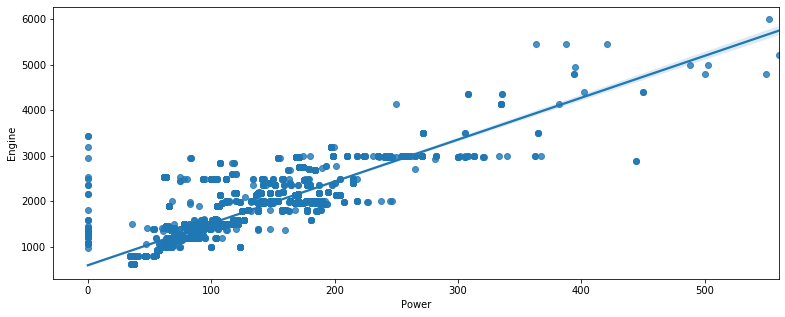

In [ ]:
plt.figure(figsize=(13,5))
sns.regplot(x='Power', y='Engine', data=data)

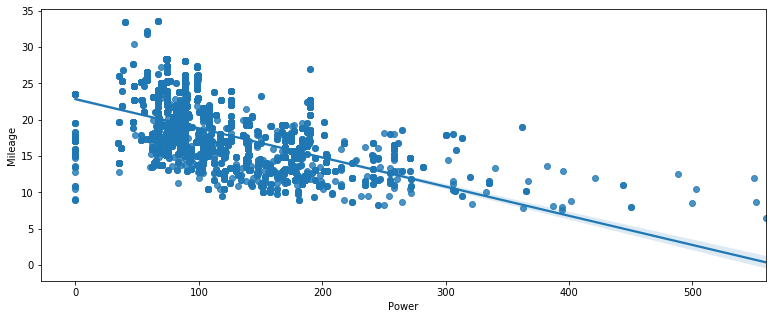

In [ ]:
plt.figure(figsize=(13,5))
sns.regplot(x='Power', y='Mileage', data=data)

<BarContainer object of 5949 artists>

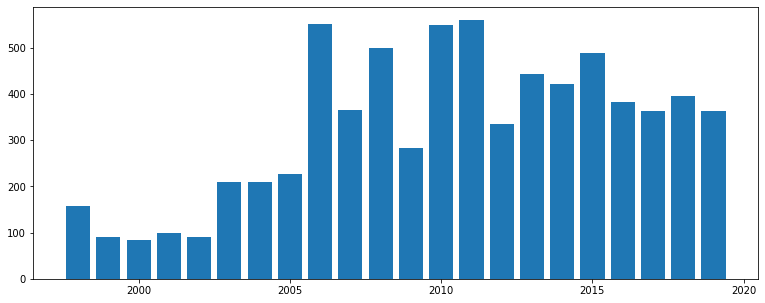

In [ ]:
plt.figure(figsize=(13,5))
plt.bar(data['Year'], data['Power'] )

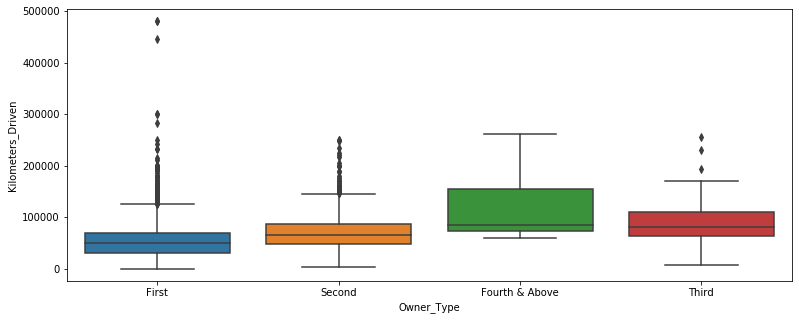

In [ ]:
plt.figure(figsize=(13,5))
sns.boxplot(outlier['Owner_Type'], outlier['Kilometers_Driven'] )